In [18]:
import osgeo_utils
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

# 검정할 컬럼 목록
columns_to_test = ["SMP", "LNG price", "SudoEnegrySelf"]

# ADF 테스트 함수
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"▶ {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")
    if result[1] < 0.05:
        print("✅ 정상 시계열입니다.\n")
    else:
        print("❌ 비정상 시계열입니다.\n")

# 반복 실행
for col in columns_to_test:
    adf_test(df[col], col)

▶ SMP
ADF Statistic: 1.3582
p-value: 0.9969
Critical Value (1%): -4.0689
Critical Value (5%): -3.1271
Critical Value (10%): -2.7017
❌ 비정상 시계열입니다.

▶ LNG price
ADF Statistic: -2.3806
p-value: 0.1473
Critical Value (1%): -3.7697
Critical Value (5%): -3.0054
Critical Value (10%): -2.6425
❌ 비정상 시계열입니다.

▶ SudoEnegrySelf
ADF Statistic: -2.5665
p-value: 0.1001
Critical Value (1%): -3.9240
Critical Value (5%): -3.0685
Critical Value (10%): -2.6739
❌ 비정상 시계열입니다.



In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

# 2. 종속변수와 설명변수 정의
y = df["SMP"]  # 종속변수: 계통한계가격
X = df[["LNG price", "SudoEnegrySelf", "Year"]]  # 설명변수: LNG, 자급률, 연도
X = sm.add_constant(X)  # 상수항 추가

# 3. 회귀 분석 (1단계)
model = sm.OLS(y, X).fit()
residuals = model.resid  # 잔차 추출

# 4. 잔차에 대해 ADF 정상성 검정 (2단계)
result = adfuller(residuals)

# 5. 결과 출력
print("=== 공적분 검정 결과 (Engle-Granger with 연도 포함) ===")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# 6. 해석
if result[1] < 0.05:
    print("✅ 공적분 관계 있음 (잔차가 정상)")
else:
    print("❌ 공적분 관계 없음 (잔차가 비정상)")


=== 공적분 검정 결과 (Engle-Granger with 연도 포함) ===
ADF Statistic: -4.0485
p-value: 0.0012
Critical Value (1%): -3.7697
Critical Value (5%): -3.0054
Critical Value (10%): -2.6425
✅ 공적분 관계 있음 (잔차가 정상)


In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
import io
import matplotlib.font_manager as fm

# 나눔 고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# CSV 파일 로드
df = pd.read_csv('/content/drive/MyDrive/계통한계가격과 수도권 자급률 연구/MetroConcentration.csv')

# 데이터 확인
print(df.head())

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   Year     SMP  LNG price  SudoEnegrySelf
0  2023  167.00     180.01          0.4894
1  2022  196.04     204.72          0.4760
2  2021   93.98      95.54          0.4845
3  2020   68.52      71.83          0.4554
4  2019   90.09      93.38          0.4455


In [21]:
# 컬럼 이름이 길어서 짧게 변경
df.columns = ['Year', 'SMP', 'LNG_price', 'Sudo_ratio']

# 회귀 모델 설정
# 종속변수 (Y)
Y = df['SMP']
# 독립변수 (X) - 상수항(intercept) 추가
X = df[['Sudo_ratio', 'LNG_price', 'Year']]
X = sm.add_constant(X)

In [22]:
# OLS 회귀분석 실행
model = sm.OLS(Y, X)
results = model.fit()

# 분석 결과 요약 출력 (참고용)
print("--- 회귀분석 결과 요약 ---")
print(results.summary())
print("\n" + "="*50 + "\n")

--- 회귀분석 결과 요약 ---
                            OLS Regression Results                            
Dep. Variable:                    SMP   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     302.1
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           3.32e-16
Time:                        01:36:48   Log-Likelihood:                -72.883
No. Observations:                  23   AIC:                             153.8
Df Residuals:                      19   BIC:                             158.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2861.4858   1037.505 

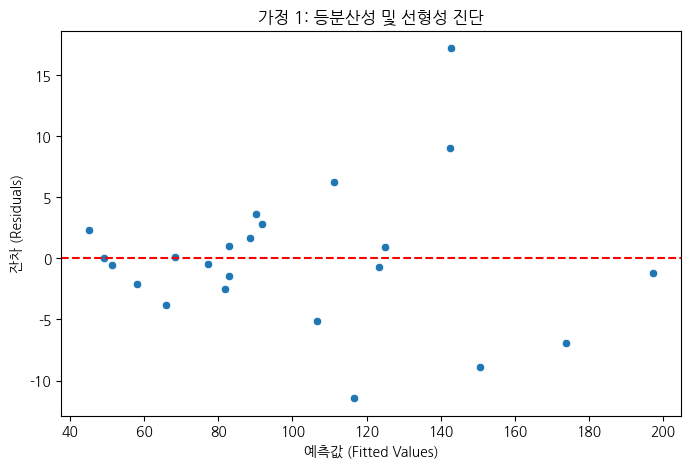


--- [등분산성] ---
Breusch-Pagan 검정 결과: LM Statistic=6.4769, p-value=0.0906
p-value가 0.05보다 크므로, 귀무가설(오차의 분산이 일정하다)을 기각할 수 없습니다. 등분산성 가정을 만족합니다.


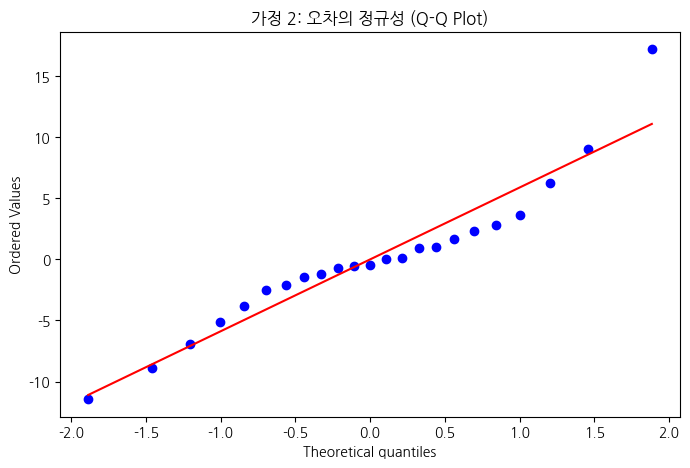


--- [오차의 정규성] ---
Q-Q Plot에서 점들이 대각선에 가깝게 분포하면 정규성을 만족합니다.
Shapiro-Wilk 검정 결과: 통계량=0.9322, p-value=0.1221
p-value가 0.05보다 크므로, 정규성 가정을 만족한다고 볼 수 있습니다.

--- [오차의 독립성 (자기상관)] ---
Durbin-Watson 통계량: 1.6714
DW 값이 2에 가까워 자기상관이 없는 것으로 보입니다.

--- [다중공선성 (VIF)] ---
   VIF Factor    features
0   617709.33       const
1        4.84  Sudo_ratio
2        2.11   LNG_price
3        6.84        Year


In [23]:
### 가정 1: 등분산성 (Homoscedasticity)
predicted_values = results.predict()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('가정 1: 등분산성 및 선형성 진단')
plt.xlabel('예측값 (Fitted Values)')
plt.ylabel('잔차 (Residuals)')
plt.show()

print("\n--- [등분산성] ---")
# Breusch-Pagan 검정 (p-value > 0.05 이면 등분산성 만족)
bp_test = sm.stats.het_breuschpagan(residuals, results.model.exog)
print(f"Breusch-Pagan 검정 결과: LM Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("p-value가 0.05보다 크므로, 귀무가설(오차의 분산이 일정하다)을 기각할 수 없습니다. 등분산성 가정을 만족합니다.")
else:
    print("p-value가 0.05보다 작으므로, 이분산성이 의심됩니다.")


### 가정 2: 오차의 정규성 (Normality of Residuals)
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('가정 2: 오차의 정규성 (Q-Q Plot)')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f"\n--- [오차의 정규성] ---")
print(f"Q-Q Plot에서 점들이 대각선에 가깝게 분포하면 정규성을 만족합니다.")
print(f"Shapiro-Wilk 검정 결과: 통계량={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("p-value가 0.05보다 크므로, 정규성 가정을 만족한다고 볼 수 있습니다.")
else:
    print("p-value가 0.05보다 작으므로, 정규성 가정을 엄격하게 만족하지는 않습니다.")


### 가정 3: 오차의 독립성 (자기상관, Autocorrelation)
dw_statistic = durbin_watson(residuals)
print(f"\n--- [오차의 독립성 (자기상관)] ---")
print(f"Durbin-Watson 통계량: {dw_statistic:.4f}")
if 1.5 <= dw_statistic <= 2.5:
    print("DW 값이 2에 가까워 자기상관이 없는 것으로 보입니다.")
elif dw_statistic < 1.5:
    print("DW 값이 2보다 현저히 작아 양(+)의 자기상관이 강하게 의심됩니다.")
else:
    print("DW 값이 2보다 현저히 커서 음(-)의 자기상관이 의심됩니다.")


### 진단 4: 다중공선성 (Multicollinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print("\n--- [다중공선성 (VIF)] ---")
print(vif.round(2))